In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h2o

In [2]:
train_df = pd.read_csv("train.csv", encoding='utf-8', index_col=0)
test_df = pd.read_csv("test.csv", encoding='utf-8', index_col=0)

# Data Processing

In [3]:
train_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [4]:
train_df.shape

(43154, 10)

In [5]:
train_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
# find unique elements in categorical columns
print(sorted(train_df.cut.unique()))
print(sorted(train_df.color.unique()))
print(sorted(train_df.clarity.unique()))

print(sorted(test_df.cut.unique()))
print(sorted(test_df.color.unique()))
print(sorted(test_df.clarity.unique()))

['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
['D', 'E', 'F', 'G', 'H', 'I', 'J']
['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
['D', 'E', 'F', 'G', 'H', 'I', 'J']
['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']


In [7]:
# ordinal encoding
cut_map = {
    "Fair": 0,
    "Good": 1,
    "Very Good": 2,
    "Premium": 3,
    "Ideal": 4
}

color_map = {
    "J": 0,
    "I": 1,
    "H": 2,
    "G": 3,
    "F": 4,
    "E": 5,
    "D": 6
}

clarity_map = {
    "I1": 0,
    "SI2": 1,
    "SI1": 2,
    "VS2": 3,
    "VS1": 4,
    "VVS2": 5,
    "VVS1": 6,
    "IF": 7
}

train_df.replace({"cut": cut_map, "color": color_map, "clarity": clarity_map}, inplace=True)
test_df.replace({"cut": cut_map, "color": color_map, "clarity": clarity_map}, inplace=True)

print(sorted(train_df.cut.unique()))
print(sorted(train_df.color.unique()))
print(sorted(train_df.clarity.unique()))

print(sorted(test_df.cut.unique()))
print(sorted(test_df.color.unique()))
print(sorted(test_df.clarity.unique()))

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]


In [8]:
train_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.01,2,5,1,60.0,60.0,4540,6.57,6.49,3.92
1,1.10,3,2,3,62.5,58.0,5729,6.59,6.54,4.10
2,1.50,1,5,1,61.5,65.0,6300,7.21,7.17,4.42
3,1.53,3,5,2,61.3,59.0,12968,7.40,7.35,4.52
4,0.84,0,6,1,64.5,60.0,2167,5.92,5.84,3.79


In [9]:
train_df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
43149,1.05,2,1,3,62.4,59.0,4975,6.48,6.51,4.05
43150,0.47,4,6,4,61.0,55.0,1617,5.03,5.01,3.06
43151,0.33,2,4,7,60.3,58.0,1014,4.49,4.46,2.70
43152,0.90,3,0,2,62.8,59.0,2871,6.13,6.03,3.82
43153,1.14,3,4,2,60.4,58.0,6320,6.82,6.79,4.11


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43154 entries, 0 to 43153
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43154 non-null  float64
 1   cut      43154 non-null  int64  
 2   color    43154 non-null  int64  
 3   clarity  43154 non-null  int64  
 4   depth    43154 non-null  float64
 5   table    43154 non-null  float64
 6   price    43154 non-null  int64  
 7   x        43154 non-null  float64
 8   y        43154 non-null  float64
 9   z        43154 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.6 MB


In [11]:
train_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000
mean,0.799047,2.905107,3.406776,3.055267,61.742925,57.459010,3946.777054,5.733798,5.737574,3.539338
std,0.475214,1.115328,1.701971,1.644493,1.428410,2.227191,3998.657385,1.123004,1.150325,0.696203
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,953.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2406.500000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5367.000000,6.540000,6.540000,4.040000
max,4.500000,4.000000,6.000000,7.000000,79.000000,79.000000,18823.000000,10.230000,58.900000,8.060000


In [12]:
# remove rows with 0s in x, y, or z columns
train_df = train_df.drop(train_df[train_df["x"] == 0].index)
train_df = train_df.drop(train_df[train_df["y"] == 0].index)
train_df = train_df.drop(train_df[train_df["z"] == 0].index)

train_df.shape

(43138, 10)

In [13]:
# remove outliers
train_df = train_df[(train_df["depth"]<75)&(train_df["depth"]>45)]
train_df = train_df[(train_df["table"]<80)&(train_df["table"]>40)]
train_df = train_df[(train_df["x"]<30)]
train_df = train_df[(train_df["y"]<30)]
train_df = train_df[(train_df["z"]<30)&(train_df["z"]>2)]

train_df.shape

(43129, 10)

In [14]:
train_df.duplicated().sum()

97

In [15]:
# remove duplicate rows
train_df = train_df.drop_duplicates(keep='first')
train_df.duplicated().sum()

0

In [16]:
train_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [17]:
train_df.nunique()

carat        270
cut            5
color          7
clarity        8
depth        174
table        122
price      10673
x            547
y            543
z            364
dtype: int64

In [18]:
train_df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.132419,-0.291035,-0.350741,0.029050,0.178861,0.921231,0.977894,0.976916,0.977085
cut,-0.132419,1.000000,0.022281,0.186447,-0.215362,-0.433595,-0.052379,-0.123383,-0.123024,-0.148659
color,-0.291035,0.022281,1.000000,-0.025590,-0.051790,-0.026289,-0.171173,-0.270009,-0.269615,-0.274772
clarity,-0.350741,0.186447,-0.025590,1.000000,-0.064943,-0.159214,-0.144770,-0.370288,-0.365085,-0.373655
depth,0.029050,-0.215362,-0.051790,-0.064943,1.000000,-0.307750,-0.009833,-0.024609,-0.027694,0.097170
table,0.178861,-0.433595,-0.026289,-0.159214,-0.307750,1.000000,0.124656,0.194118,0.188000,0.152920
price,0.921231,-0.052379,-0.171173,-0.144770,-0.009833,0.124656,1.000000,0.887599,0.889136,0.883060
x,0.977894,-0.123383,-0.270009,-0.370288,-0.024609,0.194118,0.887599,1.000000,0.998640,0.991696
y,0.976916,-0.123024,-0.269615,-0.365085,-0.027694,0.188000,0.889136,0.998640,1.000000,0.991345
z,0.977085,-0.148659,-0.274772,-0.373655,0.097170,0.152920,0.883060,0.991696,0.991345,1.000000


<AxesSubplot: >

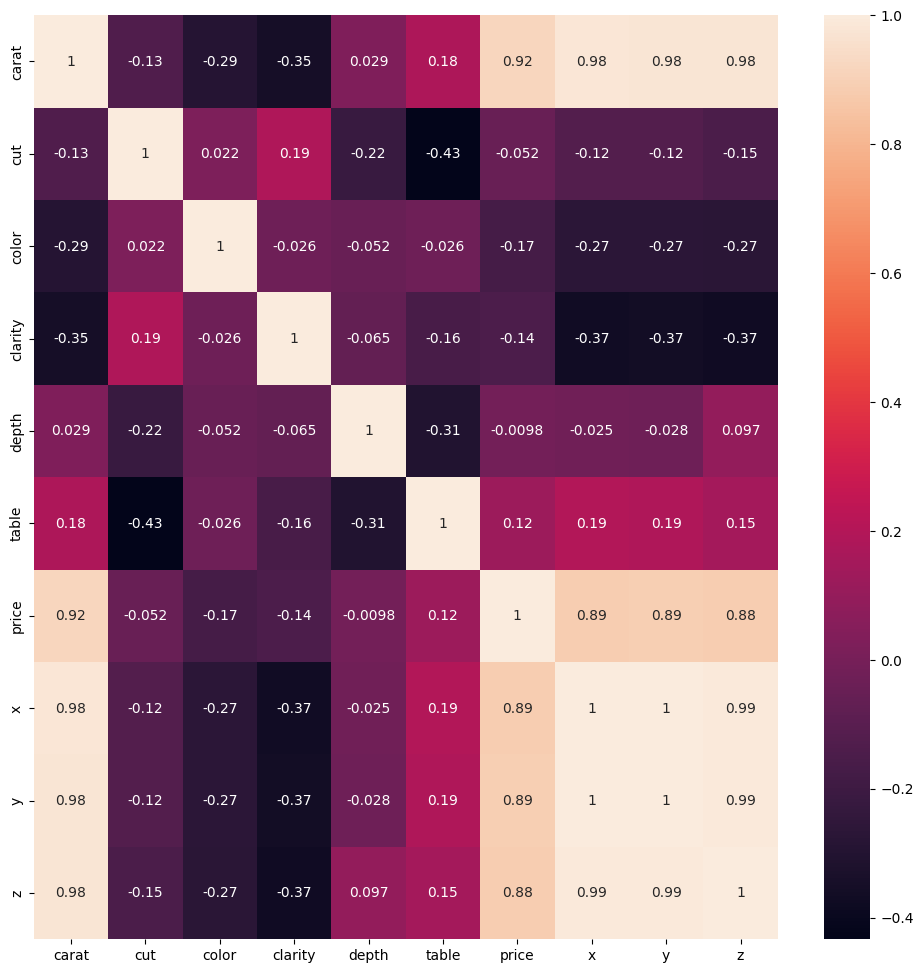

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train_df.corr(), annot=True)

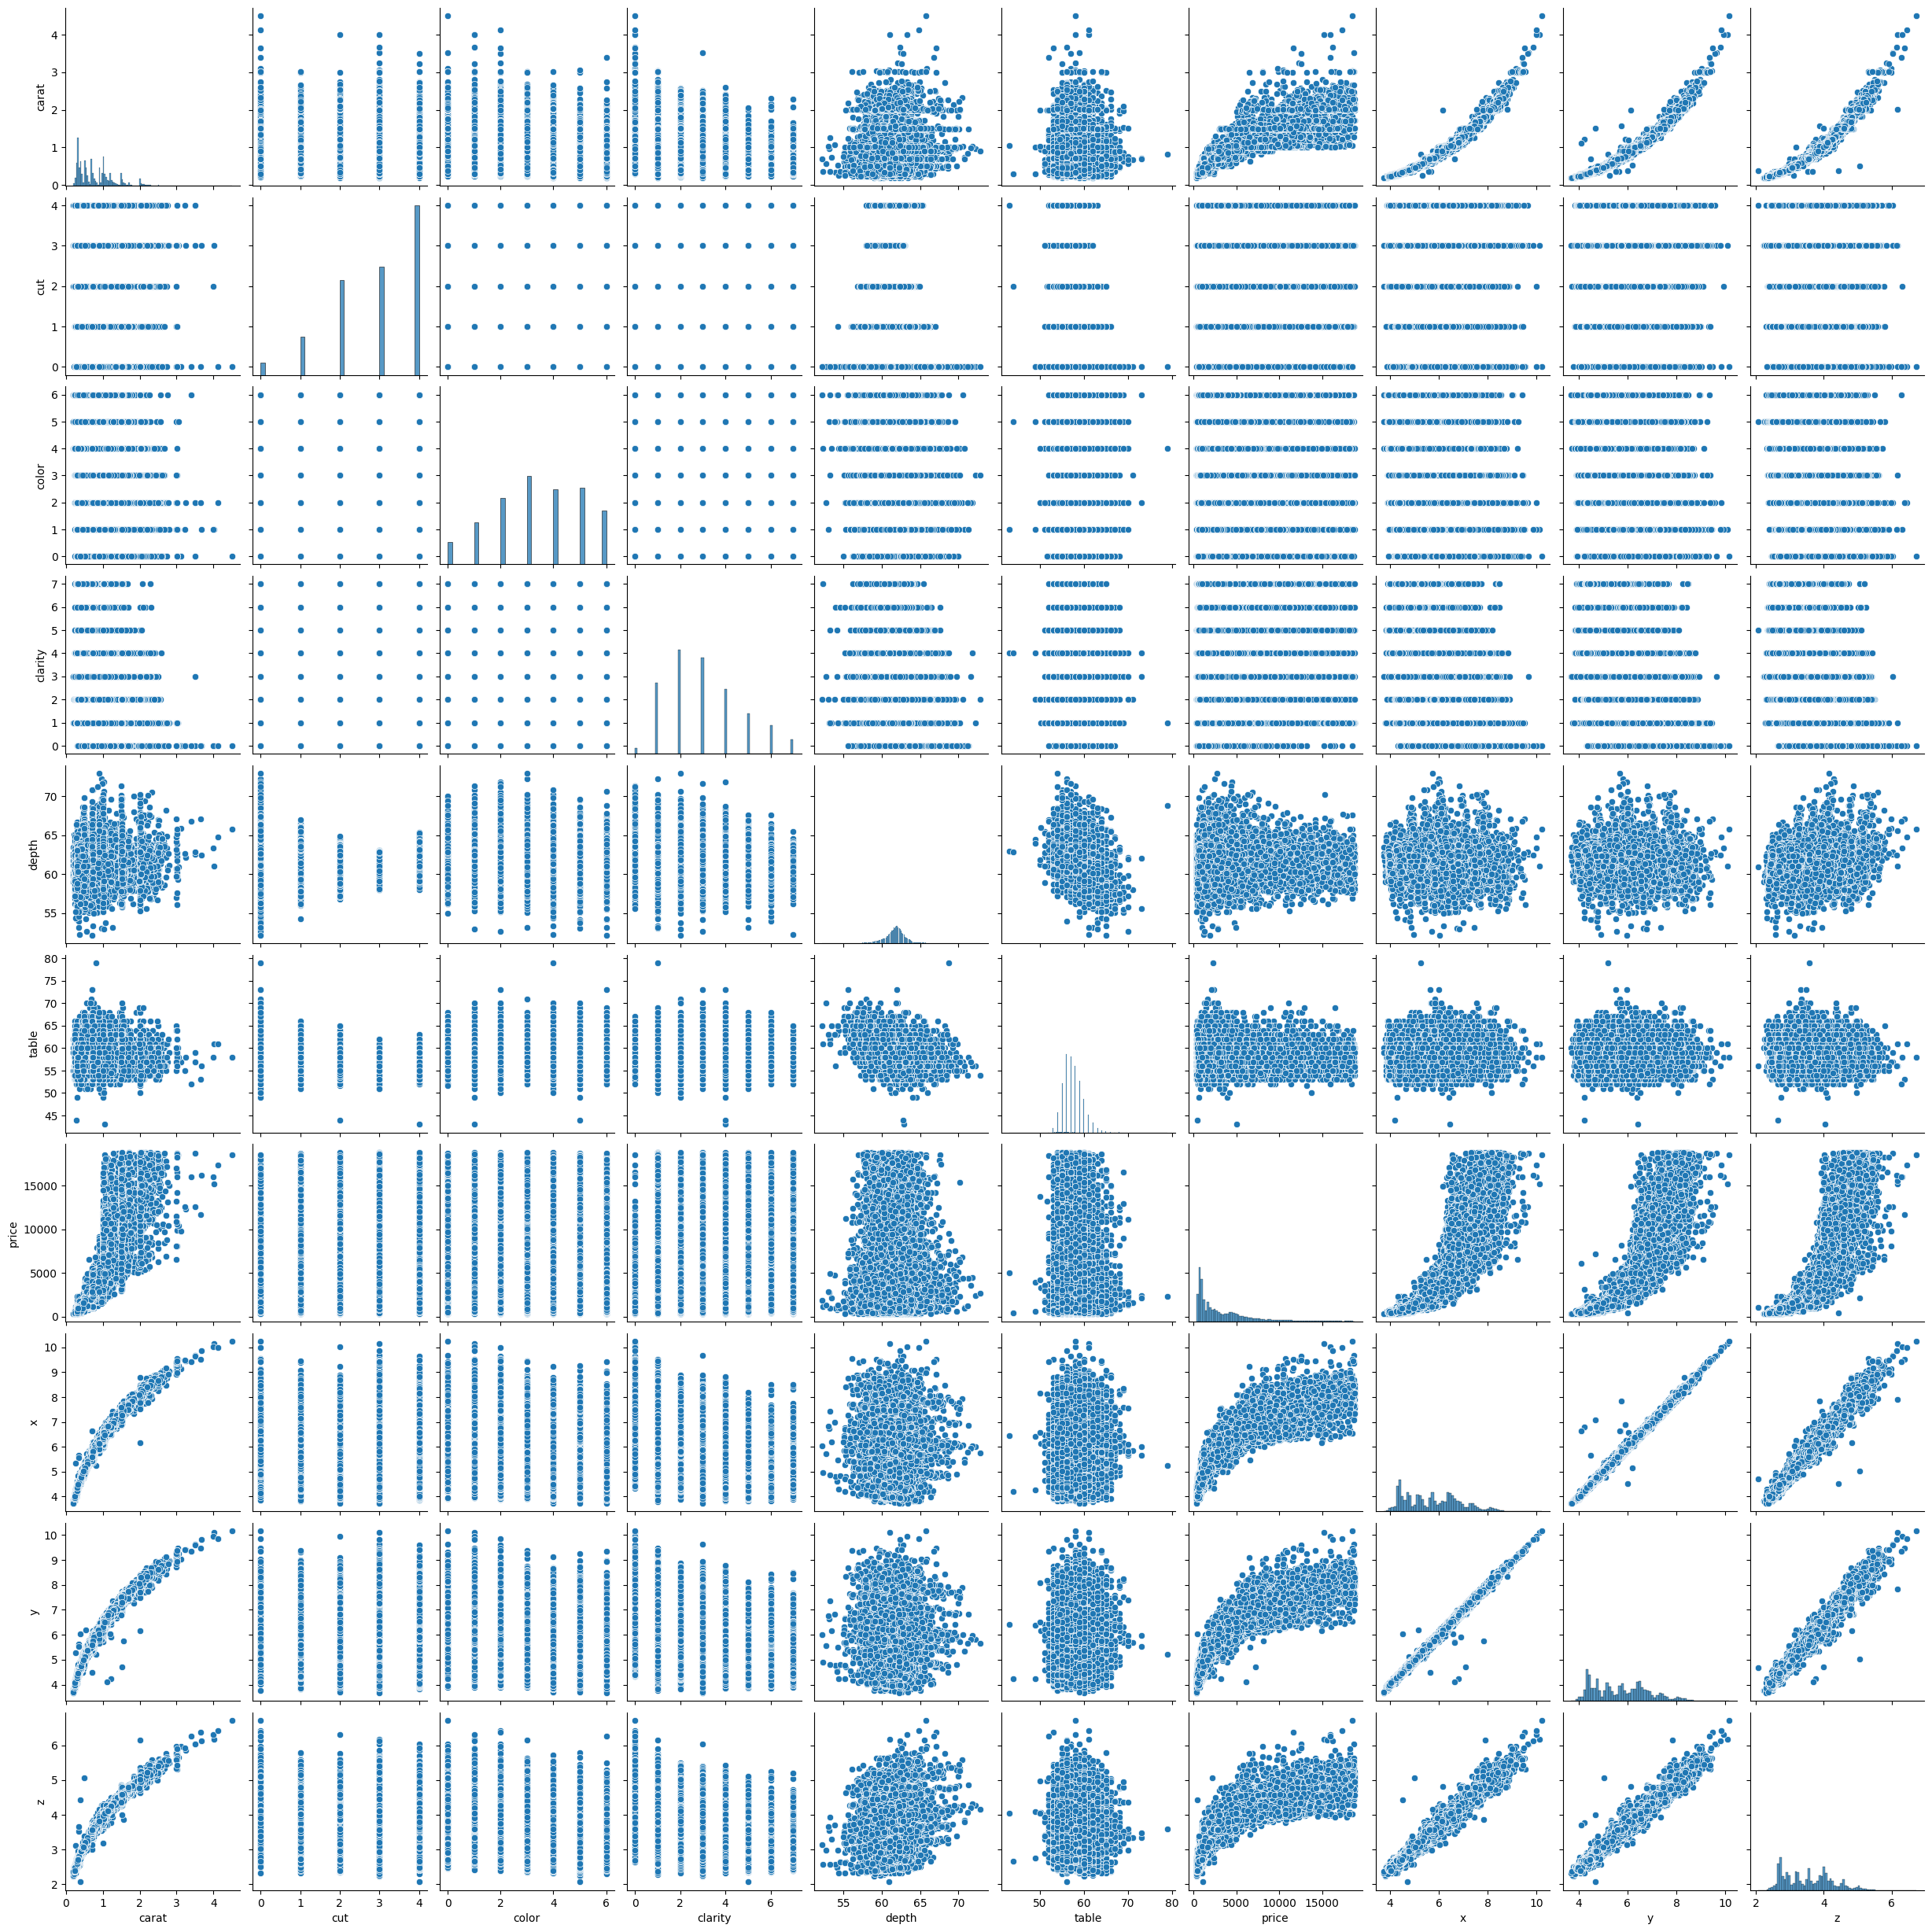

In [20]:
sns.pairplot(train_df)

# Model Selection

In [21]:
h2o.init()

In [22]:
# train using AutoML
train_hf = h2o.H2OFrame(train_df)
test_hf = h2o.H2OFrame(test_df)
y_col = "price"
aml = h2o.automl.H2OAutoML(max_runtime_secs=60*60*5, sort_metric="RMSE")
aml.train(training_frame=train_hf, y=y_col)

In [23]:
# select the best model
best_model = aml.get_best_model()
model_path = h2o.save_model(model=best_model, path="models", force=True)

In [24]:
# generate predictions for test dataset
pred = best_model.predict(test_hf)
pred_df = pred.as_data_frame()
pred_df['id'] = pred_df.index
pred_df['price'] = pred_df.predict
pred_df = pred_df[['id', 'price']]
pred_df.to_csv(f"submissions/{model_path.split('/')[-1]}_pred.csv", index=False)